In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from glob import glob 
from fastcore.xtras import load_pickle

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

import matplotx

import pandas as pd 
import numpy as np

%matplotlib inline

In [3]:
all_res = glob('out/**/*.pkl')

In [4]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded['representation']
    num_points = loaded['num_train_points']

    metrics = {
        'representation': loaded['representation'],
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['mean_absolute_error'],
        'max_error': loaded['max_error'],
        'mse': loaded['mean_squared_error']
    }

    compiled_res.append(metrics)


    gpr_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['gpr_baseline']['mean_absolute_error'],
        'max_error': loaded['gpr_baseline']['max_error'],
        'mse': loaded['gpr_baseline']['mean_squared_error']
    }

    compiled_gpr.append(gpr_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [14]:
compiled_grouped_res = compiled_res.groupby(['representation', 'num_train_points']).agg(['mean', 'std', 'count'])

In [15]:
compiled_gpr_grouped = compiled_gpr.groupby(['num_train_points']).agg(['mean', 'std'])

In [16]:
compiled_grouped_res

mae                 max_error            \
                                     mean       std count      mean       std   
representation num_train_points                                                 
inchi          10                     NaN       NaN     0       NaN       NaN   
               50                1.172027  0.155881     3  4.063333  0.701593   
               100               1.092187  0.085583     3  4.280000  0.945992   
               200               1.106540  0.029896     2  4.605000  0.275772   
               500               0.994840  0.125016     2  4.330000  1.046518   
iupac_name     10                1.815216       NaN     1  4.430000       NaN   
               50                1.174240       NaN     1  4.460000       NaN   
selfies        10                0.995120       NaN     1  3.700000       NaN   
               50                1.246900  0.038438     2  4.700000  0.424264   
               100               1.080680       NaN     1  3.060000       NaN   
               200               1.011080       NaN     1  3.630000       NaN   
               500               1.008880       NaN     1  3.800000       NaN   
smiles         10                1.207360  0.329170     3  3.910000  0.453100   
               50                1.109630  0.050271     4  4.225000  0.515202   
               100               1.017420  0.019390     4  3.957500  0.197885   
               200               1.039880  0.055644     4  3.850000  0.101653   
               500               0.926067  0.056595     3  3.713333  0.505800   

                                            mse                  
                                count      mean       std count  
representation num_train_points                                  
inchi          10                   0       NaN       NaN     0  
               50                   3  2.153885  0.508503     3  
               100                  3  1.898015  0.325697     3  
               200                  2  2.029607  0.003519     2  
               500                  2  1.622732  0.508750     2  
iupac_name     10                   1  4.538035       NaN     1  
               50                   1  2.237502       NaN     1  
selfies        10                   1  1.501540       NaN     1  
               50                   2  2.458462  0.184286     2  
               100                  1  1.749705       NaN     1  
               200                  1  1.578111       NaN     1  
               500                  1  1.607942       NaN     1  
smiles         10                   3  2.268977  1.268094     3  
               50                   4  1.973159  0.272590     4  
               100                  4  1.651661  0.084223     4  
               200                  4  1.752343  0.238844     4  
               500                  3  1.406836  0.155101     3

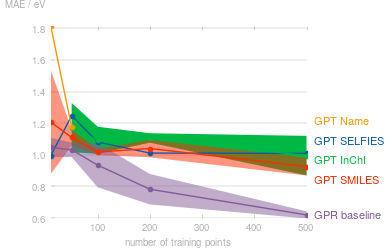

In [13]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1,1)
    ax.plot(
        compiled_grouped_res.loc["selfies", :].index, 
        compiled_grouped_res.loc["selfies", :]['mae']['mean'], 
        label='GPT SELFIES', 
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["selfies", :].index, 
        compiled_grouped_res.loc["selfies", :]['mae']['mean'] - compiled_grouped_res.loc["selfies", :]['mae']['std'], 
        compiled_grouped_res.loc["selfies", :]['mae']['mean'] + compiled_grouped_res.loc["selfies", :]['mae']['std'], 
    )

    ax.plot(
        compiled_grouped_res.loc["inchi", :].index, 
        compiled_grouped_res.loc["inchi", :]['mae']['mean'], 
        label='GPT InChI', 
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["inchi", :].index, 
        compiled_grouped_res.loc["inchi", :]['mae']['mean'] - compiled_grouped_res.loc["inchi", :]['mae']['std'], 
        compiled_grouped_res.loc["inchi", :]['mae']['mean'] + compiled_grouped_res.loc["inchi", :]['mae']['std'], 
    )


    ax.plot(
        compiled_grouped_res.loc["iupac_name", :].index, 
        compiled_grouped_res.loc["iupac_name", :]['mae']['mean'], 
        label='GPT Name', 
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["iupac_name", :].index, 
        compiled_grouped_res.loc["iupac_name", :]['mae']['mean'] - compiled_grouped_res.loc["iupac_name", :]['mae']['std'], 
        compiled_grouped_res.loc["iupac_name", :]['mae']['mean'] + compiled_grouped_res.loc["iupac_name", :]['mae']['std'], 
    )
    
    ax.plot(
        compiled_grouped_res.loc["smiles", :].index, 
        compiled_grouped_res.loc["smiles", :]['mae']['mean'], 
        label='GPT SMILES',
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["smiles", :].index, 
        compiled_grouped_res.loc["smiles", :]['mae']['mean'] - compiled_grouped_res.loc["smiles", :]['mae']['std'], 
        compiled_grouped_res.loc["smiles", :]['mae']['mean'] + compiled_grouped_res.loc["smiles", :]['mae']['std'], 
        alpha=.5
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index, 
        compiled_gpr_grouped['mae']['mean'], 
        label='GPR baseline',
        marker='o'
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[ :].index, 
        compiled_gpr_grouped.loc[:]['mae']['mean'] - compiled_gpr_grouped.loc[ :]['mae']['std'], 
        compiled_gpr_grouped.loc[ :]['mae']['mean'] + compiled_gpr_grouped.loc[ :]['mae']['std'], 
        alpha=.5
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel('number of training points', labelpad=4)
    matplotx.ylabel_top('MAE / eV')
    #ax.set_xscale('log')

fig.savefig('lipophilicity_regression_res.pdf', bbox_inches='tight')
